<a href="https://www.kaggle.com/code/sharonlogier/nutritional-breakdown-of-foods?scriptVersionId=232172221" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

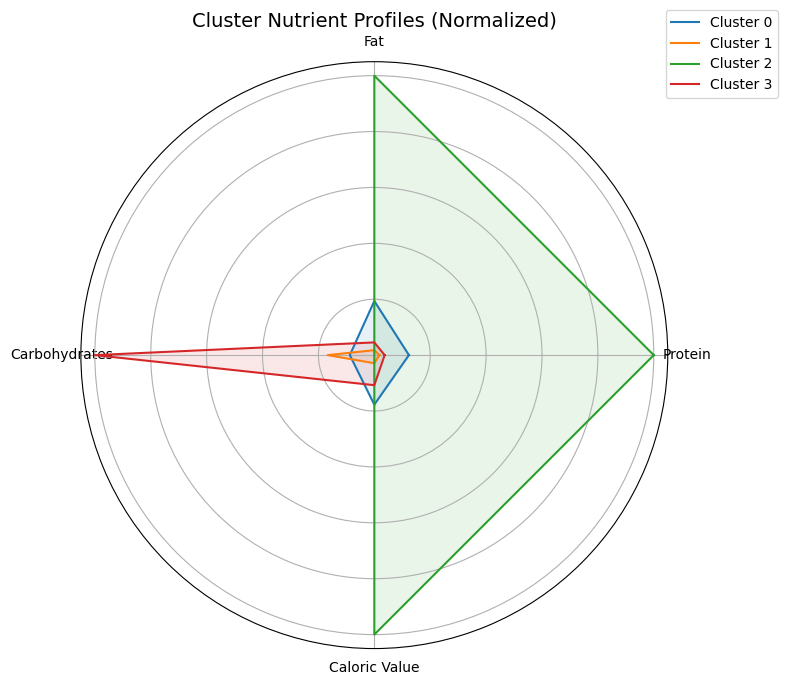

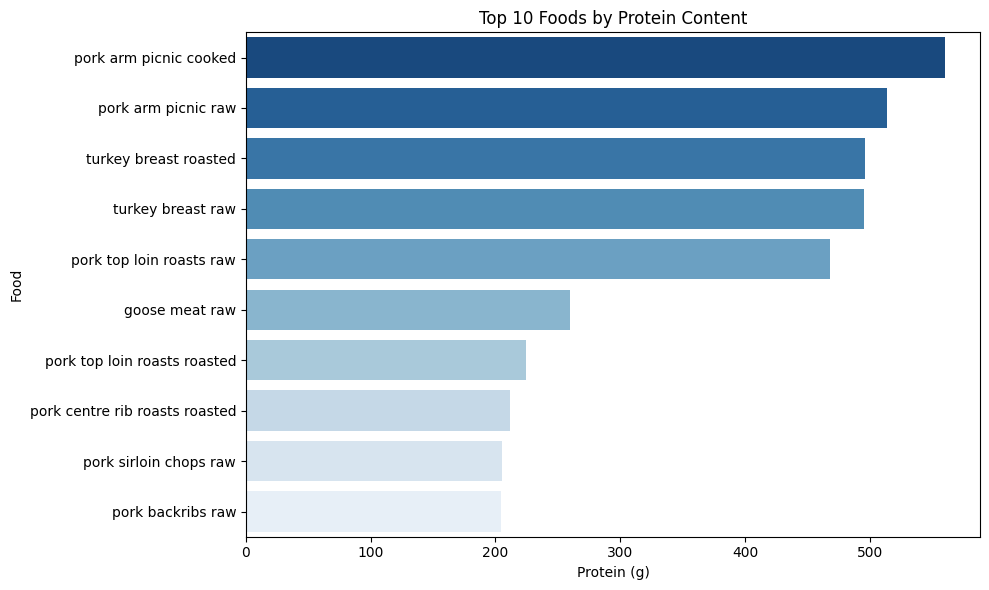

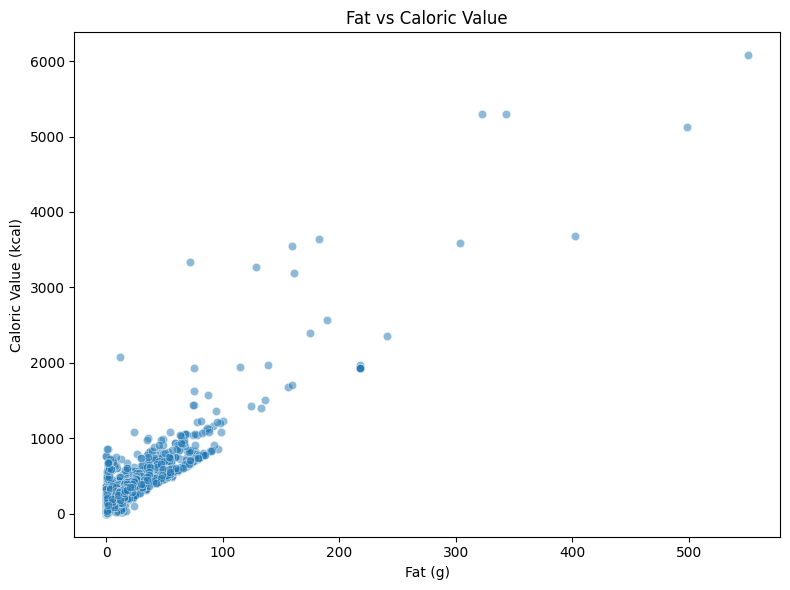

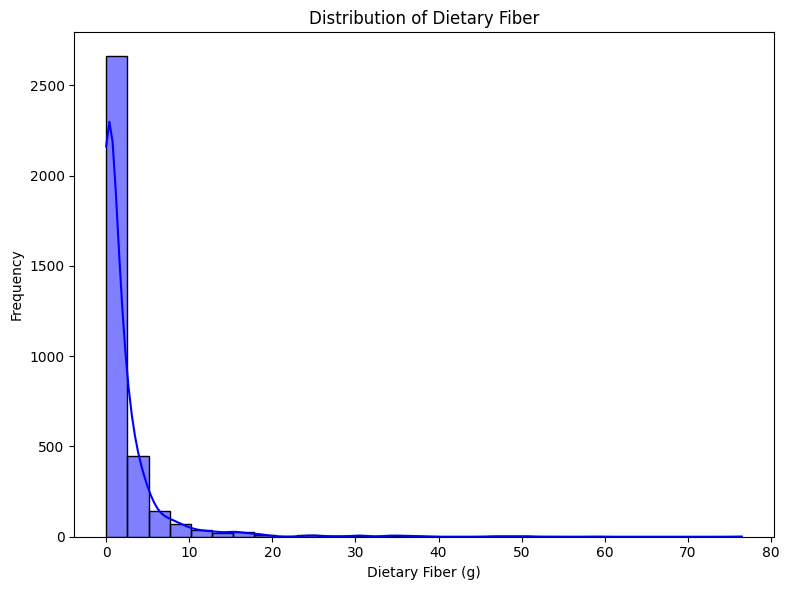

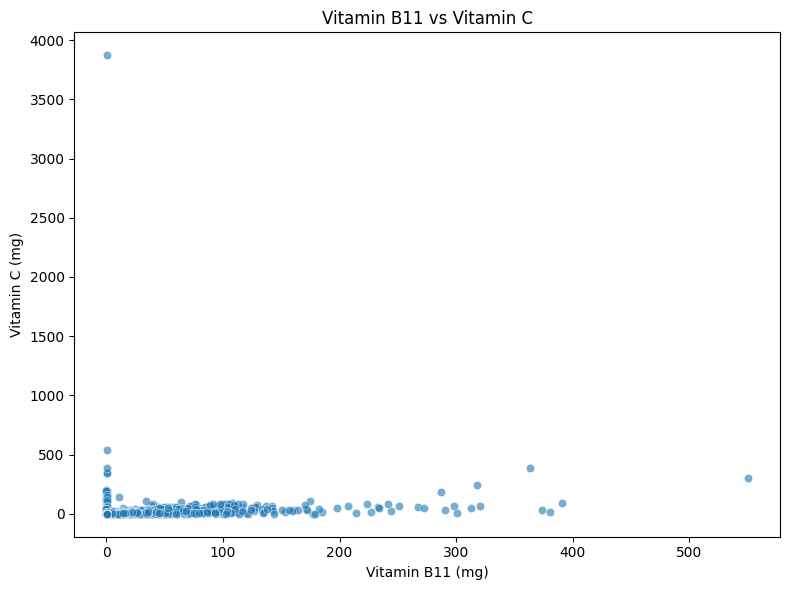

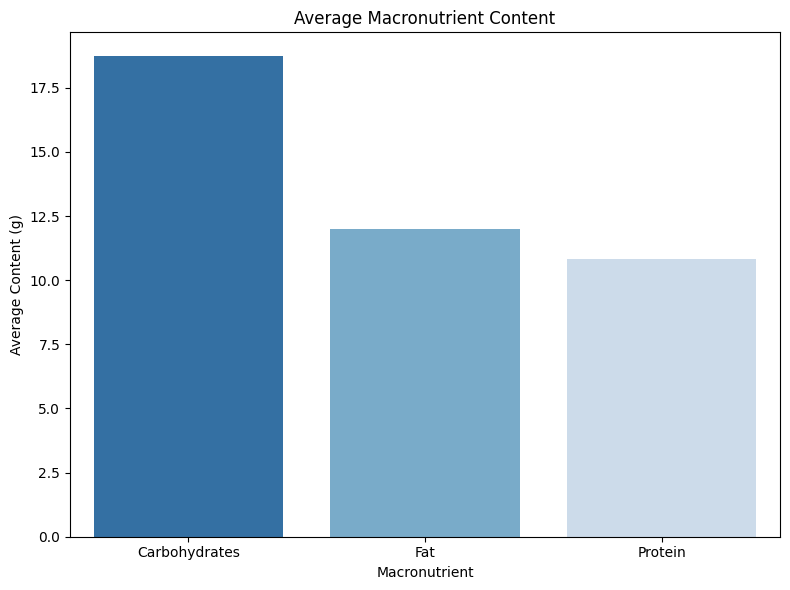

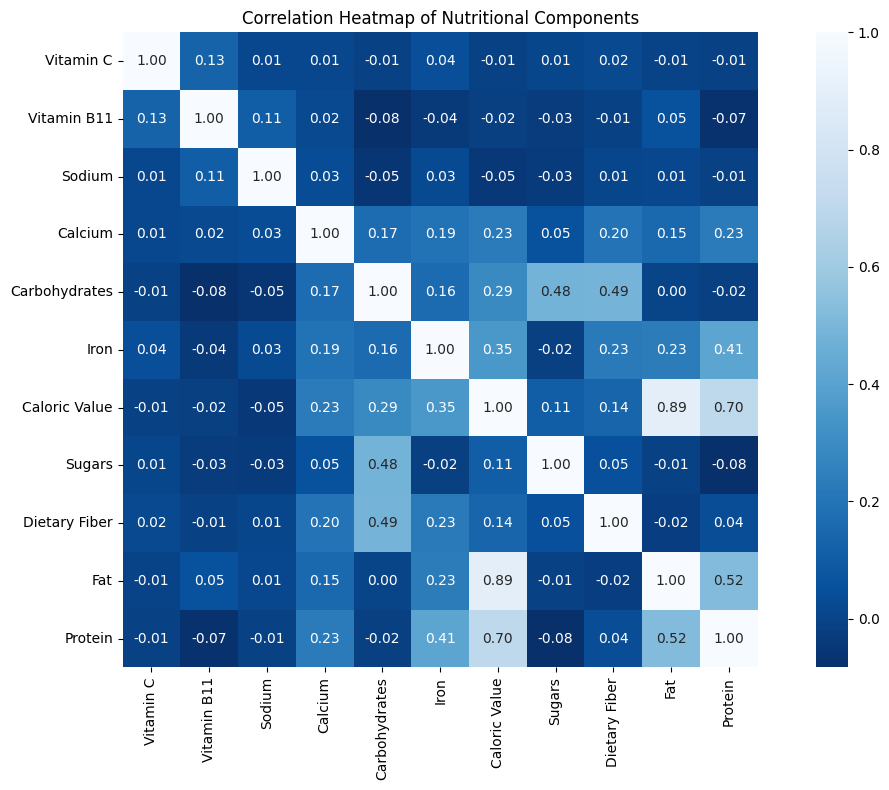

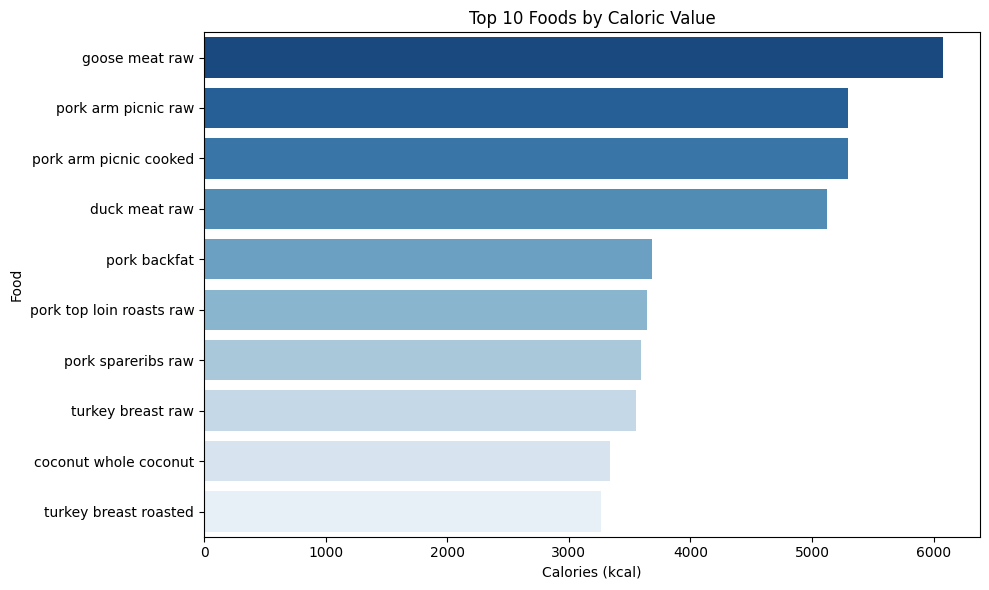

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("/kaggle/input/nutritional-breakdown-of-foods/cleaned_nutrition_dataset.csv")

warnings.simplefilter(action='ignore', category=FutureWarning)

# Define features
features = ['Protein', 'Fat', 'Carbohydrates', 'Caloric Value']

# Clean and scale data
X = df[features].replace([np.inf, -np.inf], np.nan).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_clean = df[features].replace([np.inf, -np.inf], np.nan).dropna()
df_clean['Cluster'] = clusters
cluster_profiles = df_clean.groupby('Cluster')[features].mean().round(2)

# Average nutrient values by cluster
cluster_profiles = df_clean.groupby('Cluster')[features].mean().round(2)

# Prepare data
labels = cluster_profiles.columns.tolist()
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Normalize data for better comparison on the radar chart
cluster_norm = cluster_profiles / cluster_profiles.max()
cluster_norm = cluster_norm[labels]
cluster_norm = cluster_norm.reset_index(drop=True)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in cluster_norm.iterrows():
    values = row.tolist()
    values += values[:1]  # repeat the first value to close the loop
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

# Aesthetic adjustments
ax.set_title("Cluster Nutrient Profiles (Normalized)", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

# 1. Top 10 foods by Protein content
top_protein = df[['food_normalized', 'Protein']].sort_values(by='Protein', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_protein, y='food_normalized', x='Protein', palette='Blues_r')
plt.title('Top 10 Foods by Protein Content')
plt.xlabel('Protein (g)')
plt.ylabel('Food')
plt.tight_layout()
plt.show()

# 2. Relationship between Fat and Caloric Value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Fat', y='Caloric Value', alpha=0.5)
plt.title('Fat vs Caloric Value')
plt.xlabel('Fat (g)')
plt.ylabel('Caloric Value (kcal)')
plt.tight_layout()
plt.show()

# 3. Distribution of Dietary Fiber
plt.figure(figsize=(8, 6))
sns.histplot(df['Dietary Fiber'], bins=30, kde=True, color='blue')
plt.title('Distribution of Dietary Fiber')
plt.xlabel('Dietary Fiber (g)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Vitamin B11 and Vitamin C correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Vitamin B11', y='Vitamin C', alpha=0.6)
plt.title('Vitamin B11 vs Vitamin C')
plt.xlabel('Vitamin B11 (mg)')
plt.ylabel('Vitamin C (mg)')
plt.tight_layout()
plt.show()

# 5. Macronutrient composition: Protein, Fat, Carbohydrates
macronutrient_means = df[['Protein', 'Fat', 'Carbohydrates']].mean().sort_values(ascending=False).reset_index()
macronutrient_means.columns = ['Macronutrient', 'Average Content']

plt.figure(figsize=(8, 6))
sns.barplot(data=macronutrient_means, x='Macronutrient', y='Average Content', palette='Blues_r')
plt.title('Average Macronutrient Content')
plt.xlabel('Macronutrient')
plt.ylabel('Average Content (g)')
plt.tight_layout()
plt.show()

# 6. Correlation heatmap of all nutritional components
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns=['food', 'food_normalized']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Nutritional Components')
plt.tight_layout()
plt.show()

# 7. Top 10 foods by Caloric Value
top_calories = df[['food_normalized', 'Caloric Value']].sort_values(by='Caloric Value', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_calories, y='food_normalized', x='Caloric Value', palette='Blues_r')
plt.title('Top 10 Foods by Caloric Value')
plt.xlabel('Calories (kcal)')
plt.ylabel('Food')
plt.tight_layout()
plt.show()

